# Affinidi Vault - Credential Storage
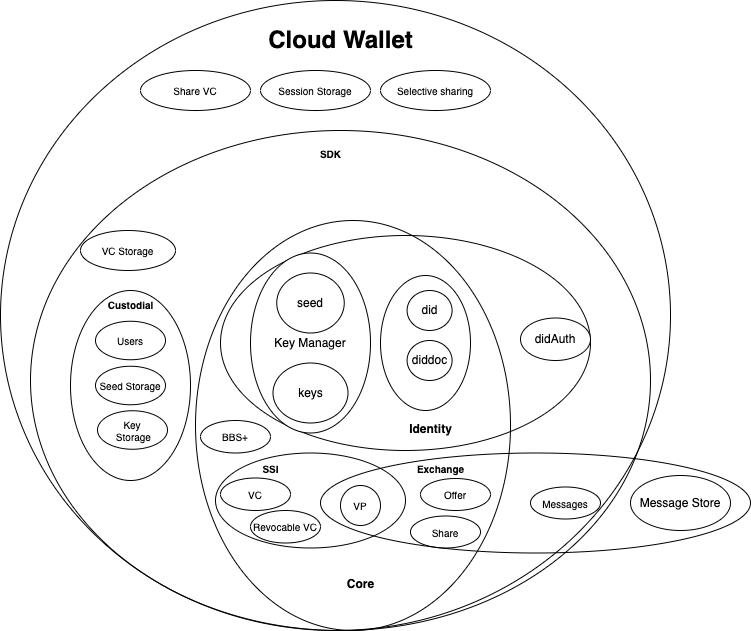

It is quite popular setup for edge wallets to have a VCs backup strategy.
here Affinidi Vault could help a lot [api](https://affinidi-vault.prod.affinity-project.org/api-docs/#/)

## Follow a Video 
<div class="container16x9"><iframe src="https://www.youtube.com/embed/JEcq75Fv6aI" class="responsive-iframe" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe></div>

In [1]:
const { createWallet } = require('@affinidi/wallet-node-sdk')
const walletFactory = createWallet('AffinityCore')


Lets setup wallets

In [2]:
const accessApiKey = '<yourkey>'

In [4]:
const options = {
    env: 'prod',
    accessApiKey:accessApiKey,
}
  const issuerWallet = await walletFactory.createWallet(options, 'P@55word!!!')
  const holderWallet = await walletFactory.createWallet(options, 'P@55word!!!')

Setup credential

In [6]:
const jsonSchema = 'https://schema.affinidi.com/ContentLikeV1-0.json'
const jsonContext = 'https://schema.affinidi.com/ContentLikeV1-0.jsonld'
const id = `claimId:${(Math.random() + 1).toString(36).substring(2)}`
const unsignedVC = {
    '@context': ['https://www.w3.org/2018/credentials/v1', jsonContext],
    id,
    type: ['VerifiableCredential', 'ContentLike'],
    holder: {
      id: holderWallet.did
    },
    credentialSubject: {
      data: {
        '@type': ['VerifiableCredential', 'ContentLike'],
        url: 'https://www.youtube.com/watch?v=owbkzvLhblk',
        date: new Date().toISOString(),
        like: true,
        score: 10
      },
    },
    credentialSchema: {
      id:  jsonSchema,
      type: 'JsonSchemaValidator2018',
    },
    issuanceDate: new Date().toISOString(),
    expirationDate: '2065-09-10T00:00:00.000Z',
  }   
const signedCredentials = await issuerWallet.signUnsignedCredential(
      unsignedVC
    )


## Store Credential

In [8]:
const ids = await holderWallet.saveCredentials([signedCredentials])


In [9]:
ids

[
  {
    credentialId: '6331173b7fc93f78dfc8c7ea189e7840e30f7e7092d91fadee180e6a60a86c8e',
    credentialTypes: [
      '7ae5c137a7bcbb6b1c3a91b4a4ffca90ebfaa6beb114e30c429764eb463e7077',
      'bc8b94d2c4531a295ad72413b93d4d6946fdf0092d565d45e580d2fca641487f'
    ],
    createdAt: '2022-09-29T13:06:16.858Z',
    payload: '{"iv":"d773358c40228b6067d3b997aafd2b63","ephemPublicKey":"046579997ee59c2a9318b909649207ba1d192a2fd1c0da48f3e733625991d0e25784019fe72408e2647197951c878065a608e171886c07f88f2bd51a7b3e3d3316","ciphertext":"29ca1960269455072d1ca659b47c359a6e5d33d58a357a1b0ec8b126c12849b76e031a0aef16e31a43c728a6b25fad0db7f01f1fb79bf1fa15c47b1144bb5c92e1e1e5163905e686b27fc5fc91659826a7c91a30a189b54a6b7ccbb9e3cedafec2086fe51f51f53e54dd7fbaf971c5399756a4a7e78631c3c423506d5f0a92407ff55f811aa007d9f59725edee27a10ce3fda09a8dde70ae79cbeab4b331a293f3b56f323618525a8b40652ef36ff1e2af3a04be282c4fc7c495b8ec87fe4083078c51645c2a0fdff5f4f0e74deefd0e98e52a832a65f02613660acd630243a334e30cd1508a9e580b1a9

## Get credential

In [10]:
await holderWallet.getCredentialById(id)

{
  '@context': [
    'https://www.w3.org/2018/credentials/v1',
    'https://schema.affinidi.com/ContentLikeV1-0.jsonld'
  ],
  id: 'claimId:yxg1bozxkkh',
  type: [ 'VerifiableCredential', 'ContentLike' ],
  holder: {
    id: 'did:elem:EiDv_8C70Gtbw5-577Sk0sN1-UwNT38GGZJVQM1fQoRu_Q;elem:initial-state=eyJwcm90ZWN0ZWQiOiJleUp2Y0dWeVlYUnBiMjRpT2lKamNtVmhkR1VpTENKcmFXUWlPaUlqY0hKcGJXRnllU0lzSW1Gc1p5STZJa1ZUTWpVMlN5SjkiLCJwYXlsb2FkIjoiZXlKQVkyOXVkR1Y0ZENJNkltaDBkSEJ6T2k4dmR6TnBaQzV2Y21jdmMyVmpkWEpwZEhrdmRqSWlMQ0p3ZFdKc2FXTkxaWGtpT2x0N0ltbGtJam9pSTNCeWFXMWhjbmtpTENKMWMyRm5aU0k2SW5OcFoyNXBibWNpTENKMGVYQmxJam9pVTJWamNESTFObXN4Vm1WeWFXWnBZMkYwYVc5dVMyVjVNakF4T0NJc0luQjFZbXhwWTB0bGVVaGxlQ0k2SWpBek1qZGlOelkzTURSak9ETm1PV05tT1RFMVlXRTVPRGMwTmpreE0ySmhPV0poTUdaak1qazRPREZoWkRCa05qQXlNMk5tWkRJNVlUUmhORFkxWlRJeU15SjlMSHNpYVdRaU9pSWpjbVZqYjNabGNua2lMQ0oxYzJGblpTSTZJbkpsWTI5MlpYSjVJaXdpZEhsd1pTSTZJbE5sWTNBeU5UWnJNVlpsY21sbWFXTmhkR2x2Ymt0bGVUSXdNVGdpTENKd2RXSnNhV05MWlhsSVpYZ2lPaUl3TW1Rd016azNZV05rWkdSa1

unknown msg_type: comm_open
unknown msg_type: comm_msg
unknown msg_type: comm_open
unknown msg_type: comm_msg
